In [1]:
import argparse
import torch
import torch.backends.cudnn as cudnn
from torchvision import models
from data_aug.contrastive_learning_dataset import ContrastiveLearningDataset
from models.resnet_simclr import ResNetSimCLR
from simclr import SimCLR
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
class Args:
    def __init__(self):
        self.data = './datasets'
        self.dataset_name = 'stl10'
        self.n_views = 2
        self.batch_size = 16
        self.workers = 0
        self.arch = 'resnet18'
        self.out_dim = 128
        self.weight_decay = 1e-4
        self.epochs = 10
        self.lr = 0.0003
        self.seed = None
        self.disable_cuda = True
        self.fp16_precision = False
        self.temperature = 0.07
        self.gpu_index = -1
        self.device = torch.device('cpu')
        self.log_every_n_steps = 100
        

In [3]:
args = Args()

dataset = ContrastiveLearningDataset(args.data)

train_dataset = dataset.get_dataset(args.dataset_name, args.n_views)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=args.batch_size, shuffle=True,
    num_workers=args.workers, pin_memory=True, drop_last=True)

model = ResNetSimCLR(base_model=args.arch, out_dim=args.out_dim)

optimizer = torch.optim.Adam(model.parameters(), args.lr, weight_decay=args.weight_decay)

scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=len(train_loader), eta_min=0,
                                                       last_epoch=-1)

Files already downloaded and verified


torch.Size([32, 3, 96, 96])


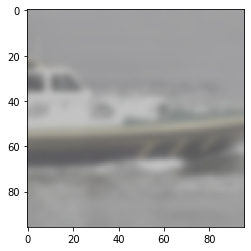

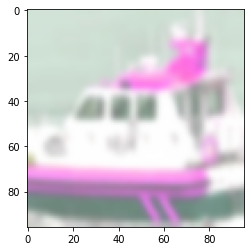

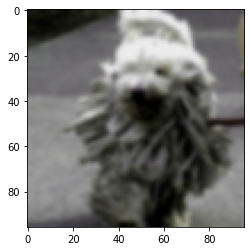

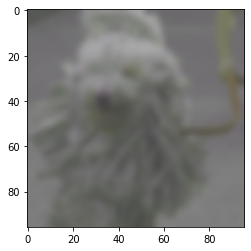

In [4]:
iter_dataloader = iter(train_loader)
images = iter_dataloader.next()[0]
images = torch.cat(images, dim=0)
print(images.shape)

img1_v1 = images[1].clone().transpose(0, 1).transpose(1, 2)
plt.figure()
plt.imshow(img1_v1)
img1_v2 = images[17].clone().transpose(0, 1).transpose(1, 2)
plt.figure()
plt.imshow(img1_v2)
img2_v1 = images[2].clone().transpose(0, 1).transpose(1, 2)
plt.figure()
plt.imshow(img2_v1)
img2_v2 = images[18].clone().transpose(0, 1).transpose(1, 2)
plt.figure()
plt.imshow(img2_v2)



In [ ]:
with torch.cuda.device(args.gpu_index):
        simclr = SimCLR(model=model, optimizer=optimizer, scheduler=scheduler, args=args)
        simclr.train(train_loader)

 38%|█████████████████████████████▎                                                | 2352/6250 [19:27<32:02,  2.03it/s]